# 五王之战分析 - 冰与火之歌

## 简介

五王之战（War of the Five Kings）是著名严肃奇幻小说《冰与火之歌》中的著名内战。这是一场规模空前、波及七大王国的内乱。顾名思义，前后共有五人在战争中称王：乔佛里、史坦尼斯、蓝礼均声称自己是铁王座的合法继承人。除此之外，罗柏·史塔克被北境众封臣推选为北境之王，巴隆·葛雷乔伊亦再度掀起独立大旗，欲摆脱铁王座的统治，自称为铁群岛之王。



本数据集(battles.csv)包含了五王之战期间的战争，它是所有战斗的大集合。该数据是Kaggle中[Game of Thrones](https://www.kaggle.com/mylesoneill/game-of-thrones)的一部分。

数据中的变量含义解释：
```
name: 战争的名称，字符变量。
year: 战争发生的年份，数值变量。
battle_number: 本数据中的unique id，对应每一场独立的战役，数值变量。
attacker_king: 攻击方的国王，"/"表示了国王的更换。例如："Joffrey/Tommen Baratheon"意味着Tomen Baratheon继承了Joffrey的王位，分类变量。
defender_king: 防守方的国王，分类变量。
attacker_1: 攻击方将领，字符变量。
attacker_2: 攻击方将领，字符变量。
attacker_3: 攻击方将领，字符变量。
attacker_4: 攻击方将领，字符变量。
defender_1: 防守方将领，字符变量。
defender_2: 防守方将领，字符变量。
defender_3: 防守方将领，字符变量。
defender_4: 防守方将领，字符变量。
attacker_outcome: 从攻击方角度来看的战争结果，分别有：win, loss, draw，分类变量。
battle_type: 战争的类别。pitched_battle: 双方军队在一个地点相遇并战斗，这也是最基本的战争类别；ambush: 以隐身或诡计为主要攻击手段的战争；siege: 阵地战；razing: 对未设防位置的攻击。分类变量。
major_death: 是否有重要人物的死亡，二进制变量。
major_capture: 是否有重要人物的被捕，二进制变量。
attacker_size: 攻击方力量的大小，并未对骑兵、步兵等士兵种类有所区分，数值变量。
defender_size: 防守方力量的大小，并未对骑兵、步兵等士兵种类有所区分，数值变量。
attacker_commander: 攻击方的主要指挥官。指挥官的名字中并没有包含头衔，不同的指挥官名字用逗号隔开，字符变量。
defender_commander: 防守方的主要指挥官。指挥官的名字中并没有包含头衔，不同的指挥官名字用逗号隔开，字符变量。
summer: 战争是否发生于夏天，二进制变量。
location: 战争发生的地点，字符变量。
region: 战争发生的地域，包括：Beyond the Wall, The North, The Iron Islands, The Riverlands, The Vale of Arryn, The Westerlands, The Crownlands, The Reach, The Stormlands, Dorne，分类变量。
note: 注释，字符变量。

```

## 提出问题

1. 战争发生年份的分布
2. 哪一个区域发生最多的战争？
3. 哪一个国王获得了最多的胜利？
4. 战争胜利与否受哪些关键因素影响？
5. 哪种战争类别的攻击方更容易获胜？
6. 夏天发生的战争有什么特点？

## 数据评估和清理

In [1]:
# 载入所需功能包
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 设置颜色集
one_color = 'lightseagreen'
two_color = ['lightsalmon', 'lightseagreen']
two_color2 = ['orange', 'olivedrab']
ten_color = ['lightseagreen', 'lightsalmon', 'lightgreen', 'lightpink', 'slateblue', \
             'sienna', 'violet', 'lightsteelblue', 'yellowgreen', 'lightskyblue']

In [3]:
# 读取数据
data = pd.read_csv("battles.csv")
data.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [4]:
data.tail()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
33,Second Seige of Storm's End,300,34,Joffrey/Tommen Baratheon,Stannis Baratheon,Baratheon,NaN,NaN,NaN,Baratheon,...,0.0,0.0,NaN,200.0,"Mace Tyrell, Mathis Rowan",Gilbert Farring,0.0,Storm's End,The Stormlands,NaN
34,Siege of Dragonstone,300,35,Joffrey/Tommen Baratheon,Stannis Baratheon,Baratheon,NaN,NaN,NaN,Baratheon,...,0.0,0.0,2000.0,NaN,"Loras Tyrell, Raxter Redwyne",Rolland Storm,0.0,Dragonstone,The Stormlands,NaN
35,Siege of Riverrun,300,36,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Frey,NaN,NaN,Tully,...,0.0,0.0,3000.0,NaN,"Daven Lannister, Ryman Fey, Jaime Lannister",Brynden Tully,0.0,Riverrun,The Riverlands,NaN
36,Siege of Raventree,300,37,Joffrey/Tommen Baratheon,Robb Stark,Bracken,Lannister,NaN,NaN,Blackwood,...,0.0,1.0,1500.0,NaN,"Jonos Bracken, Jaime Lannister",Tytos Blackwood,0.0,Raventree,The Riverlands,NaN
37,Siege of Winterfell,300,38,Stannis Baratheon,Joffrey/Tommen Baratheon,Baratheon,Karstark,Mormont,Glover,Bolton,...,NaN,NaN,5000.0,8000.0,Stannis Baratheon,Roose Bolton,0.0,Winterfell,The North,NaN


In [5]:
# 查看数据基本信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 25 columns):
name                  38 non-null object
year                  38 non-null int64
battle_number         38 non-null int64
attacker_king         36 non-null object
defender_king         35 non-null object
attacker_1            38 non-null object
attacker_2            10 non-null object
attacker_3            3 non-null object
attacker_4            2 non-null object
defender_1            37 non-null object
defender_2            2 non-null object
defender_3            0 non-null float64
defender_4            0 non-null float64
attacker_outcome      37 non-null object
battle_type           37 non-null object
major_death           37 non-null float64
major_capture         37 non-null float64
attacker_size         24 non-null float64
defender_size         19 non-null float64
attacker_commander    37 non-null object
defender_commander    28 non-null object
summer                37 non-null flo

由以上数据信息可知，总共有38条战争数据，含缺失值的列较多，需要更深入地探索含有缺失值的列数据。其中defender_3和defeber_4全部是缺失值，note信息显示不全，可以清除这三列数据。

In [6]:
data.describe(include='all')

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
count,38,38.000000,38.000000,36,35,38,10,3,2,37,...,37.000000,37.000000,24.000000,19.000000,37,28,37.000000,37,38,5
unique,38,NaN,NaN,4,6,11,7,2,1,12,...,NaN,NaN,NaN,NaN,31,28,NaN,27,7,5
top,Battle at the Mummer's Ford,NaN,NaN,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Tully,Mormont,Glover,Lannister,...,NaN,NaN,NaN,NaN,Gregor Clegane,Jaime Lannister,NaN,Riverrun,The Riverlands,Greyjoy's troop number based on the Battle of ...
freq,1,NaN,NaN,14,14,8,3,2,2,9,...,NaN,NaN,NaN,NaN,4,1,NaN,3,17,1
mean,NaN,299.105263,19.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.351351,0.297297,9942.541667,6428.157895,NaN,NaN,0.702703,NaN,NaN,NaN
std,NaN,0.689280,11.113055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.483978,0.463373,20283.092065,6225.182106,NaN,NaN,0.463373,NaN,NaN,NaN
min,NaN,298.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,20.000000,100.000000,NaN,NaN,0.000000,NaN,NaN,NaN
25%,NaN,299.000000,10.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,1375.000000,1070.000000,NaN,NaN,0.000000,NaN,NaN,NaN
50%,NaN,299.000000,19.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,4000.000000,6000.000000,NaN,NaN,1.000000,NaN,NaN,NaN
75%,NaN,300.000000,28.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,1.000000,8250.000000,10000.000000,NaN,NaN,1.000000,NaN,NaN,NaN


In [7]:
# 数据清洗

In [8]:
# 删除不需要的行
df = data.drop(['defender_3', 'defender_4', 'note'], axis=1)

In [9]:
# 查看攻击方和防守方国王列的数据
df[['name','attacker_king','defender_king']]

,name,attacker_king,defender_king
0,Battle of the Golden Tooth,Joffrey/Tommen Baratheon,Robb Stark
1,Battle at the Mummer's Ford,Joffrey/Tommen Baratheon,Robb Stark
2,Battle of Riverrun,Joffrey/Tommen Baratheon,Robb Stark
3,Battle of the Green Fork,Robb Stark,Joffrey/Tommen Baratheon
4,Battle of the Whispering Wood,Robb Stark,Joffrey/Tommen Baratheon
5,Battle of the Camps,Robb Stark,Joffrey/Tommen Baratheon
6,Sack of Darry,Joffrey/Tommen Baratheon,Robb Stark
7,Battle of Moat Cailin,Balon/Euron Greyjoy,Robb Stark
8,Battle of Deepwood Motte,Balon/Euron Greyjoy,Robb Stark
9,Battle of the Stony Shore,Balon/Euron Greyjoy,Robb Stark


可见有两场战役的攻击方和防守方均无国王，‘Retaking of Harrenhal’战役的防守方无国王。

In [10]:
# 处理攻击方和防守方国王列的缺失值，填充为‘No King’
df.loc[:,'attacker_king':'defender_king'] = df.loc[:,'attacker_king':'defender_king'].fillna('No King')

In [11]:
# 填充攻击方和防守方将领，主要指挥官缺失值为‘No’
df.loc[:,'attacker_1':'defender_2'] = df.loc[:,'attacker_1':'defender_2'].fillna('No')
df.loc[:,'attacker_commander':'defender_commander'] = df.loc[:,'attacker_commander':'defender_commander'].fillna('No')

In [12]:
# 删除最后一场战役数据，因为含有过多缺失值，且无战争结果，对决定战争胜利因素的最终分析影响不大
df = df.iloc[:-1,:]

In [13]:
# 填充地点的缺失值为'Unknown'
df['location'].fillna('Unknown', inplace=True)

In [14]:
# 查看当前数据的基本信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 22 columns):
name                  37 non-null object
year                  37 non-null int64
battle_number         37 non-null int64
attacker_king         37 non-null object
defender_king         37 non-null object
attacker_1            37 non-null object
attacker_2            37 non-null object
attacker_3            37 non-null object
attacker_4            37 non-null object
defender_1            37 non-null object
defender_2            37 non-null object
attacker_outcome      37 non-null object
battle_type           37 non-null object
major_death           37 non-null float64
major_capture         37 non-null float64
attacker_size         23 non-null float64
defender_size         18 non-null float64
attacker_commander    37 non-null object
defender_commander    37 non-null object
summer                36 non-null float64
location              37 non-null object
region                37 non-null

数据清洗完成，因为无法用准确数字代替，所以保留float64数据格式的列的缺失值。

## 数据探索分析

Text(0.5,1,'Wars in Different Years')

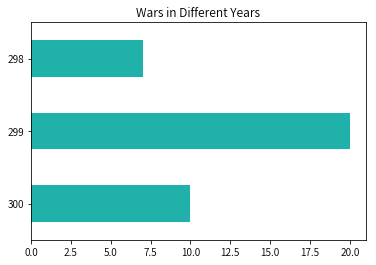

In [15]:
# 1.战争发生年份的分布
df['year'].value_counts().sort_index(ascending=False).plot.barh(color=one_color)
plt.title('Wars in Different Years')

全部战争发生在298年到300年，超过一半的战争发生在299年，这是一个多事之秋。

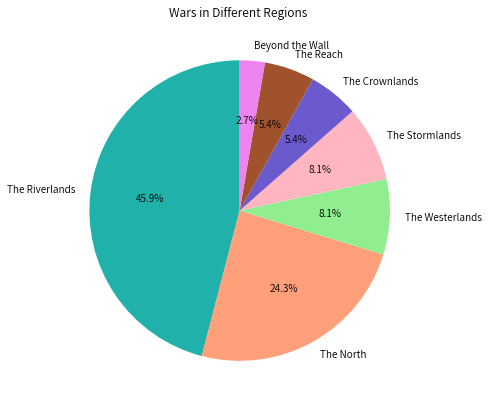

region           attacker_outcome
Beyond the Wall  loss                 1
The Crownlands   loss                 2
The North        win                  9
The Reach        win                  2
The Riverlands   win                 15
                 loss                 2
The Stormlands   win                  3
The Westerlands  win                  3
Name: attacker_outcome, dtype: int64

In [16]:
# 2.哪一个区域发生最多的战争及各区域的攻击方战果如何？
# 制作饼图
values = df['region'].value_counts()
labels = df['region'].value_counts().index
fig1, ax1 = plt.subplots(figsize=(6,7))
ax1.pie(values, labels=labels, autopct="%1.1f%%", startangle=90, textprops={'fontsize':10}, colors=ten_color)
ax1.axis('equal')
ax1.set_title('Wars in Different Regions')
plt.show()

# 探索战争区域对胜利的影响
df.groupby('region')['attacker_outcome'].value_counts()

接近一半的战争发生在The Riverlands，另外四分之一发生在The North，这两个区域是冰与火之歌的主战场。
出现在Beyond the Wall和The Crownlands的三场战斗攻击方均失利，攻击方的另外两场失利发生在主战场The Riverlands，但攻击方仍然在这里达到了胜率的平均水平，而在其他区域包括第二主战场The North，攻击方保持了全胜。攻击方应该尽量避免在Beyond the Wall和The Crownlans交战，可能这两个区域的地理情况导致易守难攻。

The Count of Attacker Outcome
win     32
loss     5
Name: attacker_outcome, dtype: int64
win     0.864865
loss    0.135135
Name: attacker_outcome, dtype: float64


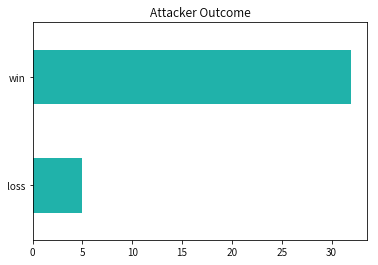

In [17]:
# 3. 战争结果的分布，即攻方的战果分布
df['attacker_outcome'].value_counts(ascending=True).plot.barh(color=one_color)
plt.title('Attacker Outcome')
print('The Count of Attacker Outcome')
print(df['attacker_outcome'].value_counts())
print(df['attacker_outcome'].value_counts(normalize=True))

由攻方战果统计可知，攻方胜率明显，有统计的37次中攻方获胜32次，胜率达到86%。为了胜利，大胆进攻吧！

Text(0.5,1,'The Kings With Most Attacks')

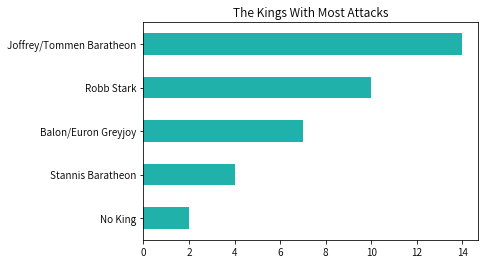

In [18]:
# 4. 哪一个国王主动进攻次数最多？
df['attacker_king'].value_counts(ascending=True).plot.barh(color=one_color)
plt.title('The Kings With Most Attacks')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


Text(0.5,1,'Total Win&Loss of Each King')

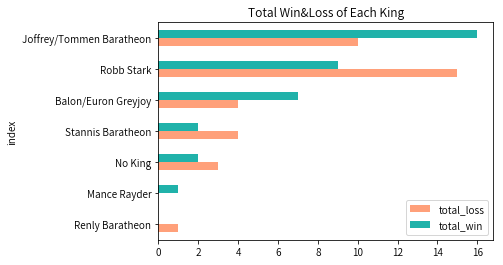

In [19]:
# 5. 哪一个国王获得了最多的胜利？
# 分别统计攻击方获胜国王和防守方获胜国王的数据
attacker_win = df[df['attacker_outcome'] == 'win']['attacker_king'].value_counts()
defender_win = df[df['attacker_outcome'] == 'loss']['defender_king'].value_counts()
attacker_loss = df[df['attacker_outcome'] == 'loss']['attacker_king'].value_counts()
defender_loss = df[df['attacker_outcome'] == 'win']['defender_king'].value_counts()

# 合并同一个国王的攻击和防守数据为DataFrame
total = pd.concat([attacker_win, defender_win, attacker_loss, defender_loss], axis=1)
total.columns=['attacker_win', 'defender_win', 'attacker_loss', 'defender_loss']
total.fillna(0, inplace=True)

# 获胜和失败次数分别求和
total['total_win'] = total['attacker_win'] + total['defender_win']
total['total_loss'] = total['attacker_loss'] + total['defender_loss']
total = total.sort_values(by='total_win').reset_index()


# 通过条形图显示国王的胜负统计
total.plot(x='index', y=['total_loss', 'total_win'], kind='barh', color=two_color)
plt.title('Total Win&Loss of Each King')

由上图可见，Joffrey/Tommen Baratheon获得了最多的胜利，Robb Stark失利次数最多。

Text(0.5,1,'Attacker Outcome in Different Battle Type')

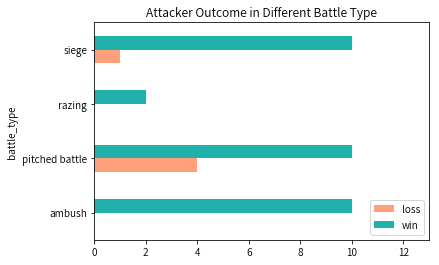

In [20]:
# 5. 哪种战争类别的攻击方更容易获胜？
df.groupby('battle_type')['attacker_outcome'].value_counts().unstack().plot.barh(color=two_color)
plt.xlim([0, 13])
plt.legend(loc='lower right')
plt.title('Attacker Outcome in Different Battle Type')

由战争类别数据可知，遭遇战pitched battle、阵地战siege和技巧战（隐身或诡计）ambush出现频率最高，其中攻击方在阵地战，突袭战和技巧战的胜率极高，攻击方如果参加遭遇战，胜率会显著降低。

Text(0.5,1,'Battle Type in Summer & Non-Summer')

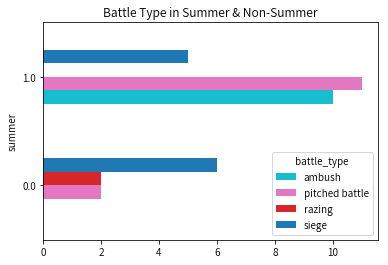

In [21]:
# 5. 夏天发生的战争有什么特点？
# 查看到夏天的战争类型特点
df.groupby('summer')['battle_type'].value_counts().unstack().plot(kind='barh', cmap='tab10_r')
plt.title('Battle Type in Summer & Non-Summer')

夏天里遭遇战和技巧战较为频繁，技巧战只发生在夏天；非夏天时段阵地战是主要的战争类别，突袭战只发生在非夏天时段。

In [22]:
# 夏天攻击方的胜率
df.groupby('summer')['attacker_outcome'].value_counts(normalize=True)

summer  attacker_outcome
0.0     win                 0.900000
        loss                0.100000
1.0     win                 0.846154
        loss                0.153846
Name: attacker_outcome, dtype: float64

非夏天时段攻击方胜率略高于夏天时段。

Text(0.5,1,'Attacker Outcome vs Different Battle Type / Summer')

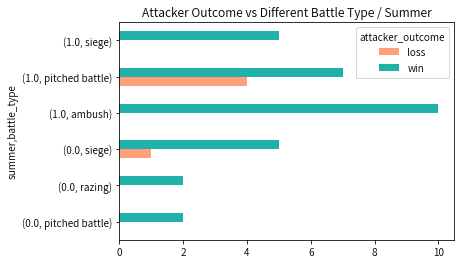

In [23]:
# 查看夏天与非夏天时不同战争类型的胜负情况
df.groupby(['summer', 'battle_type'])['attacker_outcome'].value_counts().sort_index().unstack().plot.barh(color=two_color)
plt.title('Attacker Outcome vs Different Battle Type / Summer')

夏天中，攻击方获得了阵地战和技巧战的全胜，遭遇战胜率显著低于其他战争类别胜率；在非夏天时段，攻击方采用阵地战仍然能保持较高胜率。

Text(0.5,1,'The Relation Between Troop Size And Attack Outcome')

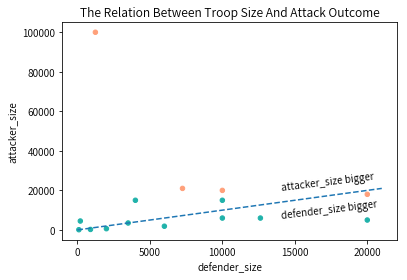

In [24]:
# 6. 攻守方兵力对战争胜利的影响
# 选取攻守方人数数据均无缺失值的战争
size_filter = df['attacker_size'].notnull() & df['defender_size'].notnull()
size_comparison = df[size_filter]

# 制作散点图分析相关性，绿点代表攻方获胜，红点代表攻方失利
size_comparison.plot(x='defender_size', y='attacker_size', c=['lightseagreen' if x == 'win' else 'lightsalmon' for x in size_comparison['attacker_outcome'].values], kind='scatter')

# 添加参考线，参考线以上为攻方人数占优的数据，参考线以下为守方人数占优的数据
plt.plot([0,21000],[0,21000], linestyle='--')
plt.text(14000, 26000, 'attacker_size bigger', rotation=7)
plt.text(14000, 12000, 'defender_size bigger', rotation=7)

plt.title('The Relation Between Troop Size And Attack Outcome')

由上图可见，攻击方人数占优的情况下，攻击方3胜3负，胜率只有50%，而防守方人数占优时，攻击方胜率6胜1负，胜率超过83%，所以在双方兵力均可知的战役中，攻守方兵力情况不是影响胜负的主要因素。

In [25]:
# 重要人物死亡对战争胜利的影响
df.groupby('major_death')['attacker_outcome'].value_counts(normalize=True).to_frame()

attacker_outcome
major_death attacker_outcome                  
0.0         win                       0.958333
            loss                      0.041667
1.0         win                       0.692308
            loss                      0.307692

重要人物死亡对攻击方胜率影响明显，重要人物死亡时，攻击方胜率只有69%，比无重要人物死亡时低了26%。

In [27]:
# 重要人物被俘对战争胜利的影响
df.groupby('major_capture')['attacker_outcome'].value_counts().to_frame()
df.groupby('major_capture')['attacker_outcome'].value_counts(normalize=True).to_frame()

attacker_outcome
major_capture attacker_outcome                  
0.0           win                       0.923077
              loss                      0.076923
1.0           win                       0.727273
              loss                      0.272727

以上数据可以看出重要人物被俘对攻击方胜率有明显影响，重要人物被俘时攻击方胜率会下降20%左右。

In [28]:
# 查看重要人物被俘和死亡同时出现时的攻击方胜利情况
df[(df['major_capture'] == 1) & (df['major_death'] == 1)]['attacker_outcome'].value_counts()

loss    3
win     3
Name: attacker_outcome, dtype: int64

In [29]:
# 查看重要人物被俘和死亡同时不出现时的攻击方胜利情况
df[(df['major_capture'] == 0) & (df['major_death'] == 0)]['attacker_outcome'].value_counts()

win     18
loss     1
Name: attacker_outcome, dtype: int64

重要人物被俘和死亡同时出现时的攻击方胜率降低到了50%，而重要人物被俘和死亡同时不出现时攻击方18胜1负，所以攻击方要尽量确保没有重要人物被俘或者死亡。

## 得出结论

根据以上的分析结果，在冰与火之歌的战争中，主动出击可以带来高达86%的胜率。攻击方为了确保胜利，可以关注以下几个方面的选择；
- 在战术方面，攻击方应该尽量避免遭遇战，选择阵地战或者夏天时使用技巧战会是更有把握的战术选择；
- 攻击方要避免重要人物被俘或者死亡，数据显示出现这两个情况时攻击方胜率会显著下降；
- 攻击方尽量避免在Beyond the Wall和The Crownlans交战，地理情况可能导致这两个区域易守难攻。

**后续改进空间**：
- 数据集信息中兵力信息缺失较多，部分名单信息缺失，但战争结果，战争类别，战争区域等信息相对完整，利于分析。
- 数据集中有较多的缺失值，大多数缺失值很难进行填充，阅读原著是一个可能获得缺失值信息的方法。
- 如果存在兵种变量，天气变量，可以对战争结果影响因素做更全面的分析。
- 目测没有混淆相关性和因果性。
- 在数据可视化方面需要提高，考虑一些更利于展示数据，分析数据的图表（雷达图等）。
